# 17일차
## 머신러닝
### 복습문제
#### 1 . 선형회귀를 그래프로 나타낸 경우이다.
- 속성이 하나일때, x축과 y축은 무엇을 나타내는가?   x값에 대해 y값을 예측
- 속성이 하나일때, 결과의 모양은 ___이다.    선
- 속성이 두개일때, 결과의 모양은 ___이다.    평면이다
- 속성이 세개 이상일때, 결과의 모양은 ___이다.   초평면

#### 2. 속성이 2개일때, 선형회귀의 방정식을 쓰고 해당하는 신경망 구조로 변환하시오.(방정식의 기호를 신경망에 대응하시오)
y^=w1x1+w2x2+b

#### 3. 행복 데이터에서,GDP 로 기대수명을 예측하는 선형회귀를 적용하고 분석해 보시오.(그래프를 그리고, 가중치 값의 의미 해석 등)
- 'Logged GDP'가 아닌 실제 GDP로 위의 결과를 재해석해 보시오.
- 기대수명으로 GDP를 예측하면 어떻개 되는지 생각해 보시오.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
happy = pd.read_csv('world_happiness_report_2021.csv')
happy.head()

,Country name,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,Finland,Western Europe,7.842,0.032,7.904,7.780,10.775,0.954,72.0,0.949,-0.098,0.186,2.43,1.446,1.106,0.741,0.691,0.124,0.481,3.253
1,Denmark,Western Europe,7.620,0.035,7.687,7.552,10.933,0.954,72.7,0.946,0.030,0.179,2.43,1.502,1.108,0.763,0.686,0.208,0.485,2.868
2,Switzerland,Western Europe,7.571,0.036,7.643,7.500,11.117,0.942,74.4,0.919,0.025,0.292,2.43,1.566,1.079,0.816,0.653,0.204,0.413,2.839
3,Iceland,Western Europe,7.554,0.059,7.670,7.438,10.878,0.983,73.0,0.955,0.160,0.673,2.43,1.482,1.172,0.772,0.698,0.293,0.170,2.967
4,Netherlands,Western Europe,7.464,0.027,7.518,7.410,10.932,0.942,72.4,0.913,0.175,0.338,2.43,1.501,1.079,0.753,0.647,0.302,0.384,2.798


In [4]:
X=happy[['Logged GDP per capita']].values
y=happy['Healthy life expectancy'].values

In [5]:
X.shape,y.shape

((149, 1), (149,))

In [6]:
from sklearn.linear_model import LinearRegression

In [7]:
model=LinearRegression()
model.fit(X,y)

LinearRegression()

In [9]:
w=model.coef_[0]
w

5.01614233919658

In [10]:
b=model.intercept_
b

17.679500487486337

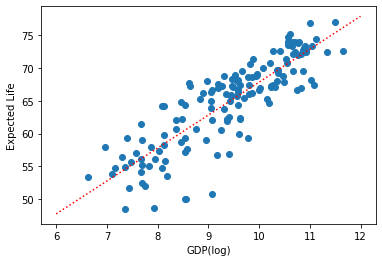

In [17]:
plt.scatter(X[:,0],y)
plt.xlabel('GDP(log)')
plt.ylabel('Expected Life')

xval=np.array([6,12])
yval=xval*w+b
plt.plot(xval,yval,'r:')
#plt.axis('equal')

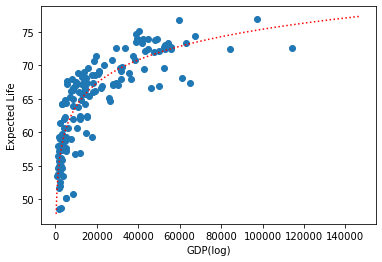

In [19]:
plt.scatter(np.exp(X[:,0]),y)
plt.xlabel('GDP(log)')
plt.ylabel('Expected Life')

xval=np.arange(6,12,0.1)
yval=xval*w+b
plt.plot(np.exp(xval),yval,'r:')
#plt.axis('equal')

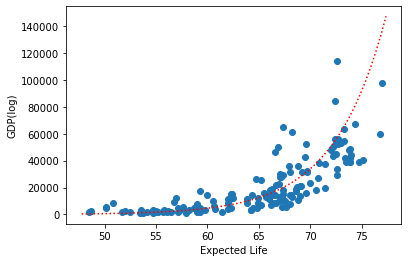

In [21]:
plt.scatter(y,np.exp(X[:,0]))
plt.ylabel('GDP(log)')
plt.xlabel('Expected Life')

xval=np.arange(6,12,0.1)
yval=xval*w+b
plt.plot(yval,np.exp(xval),'r:')
#plt.axis('equal')

In [22]:
w=1.
b=1.

In [23]:
pred_y=w*X[:,0]+b

In [24]:
pred_y

array([11.775, 11.933, 12.117, 11.878, 11.932, 12.053, 11.867, 12.647,
       11.643, 11.906, 11.796, 11.575, 11.873, 11.776, 12.342, 10.88 ,
       11.707, 11.556, 12.023, 11.823, 11.704, 11.669, 11.674, 11.871,
       12.085, 11.743, 11.571, 11.623, 11.529, 10.053, 10.966, 12.488,
       10.318, 11.369, 10.577, 10.859, 10.186, 11.499, 11.576, 11.481,
       11.35 ,  9.836, 11.071, 11.382, 11.155, 11.284, 11.817, 10.787,
       10.054, 11.008, 11.315, 10.557, 11.358, 10.805,  9.62 , 11.611,
       10.962, 11.421,  9.648, 11.217, 10.076, 11.651, 10.458, 10.59 ,
       10.454, 10.313,  9.538, 11.279, 10.046, 10.4  , 10.448, 10.94 ,
       10.802, 11.576, 10.853, 11.189, 12.   ,  9.091,  9.973, 10.622,
       11.238, 10.365,  9.117, 10.673,  9.551, 10.487,  9.12 , 11.016,
       10.826, 10.569,  9.189,  9.118, 10.52 , 10.693,  9.58 ,  8.098,
       10.629,  8.686,  9.087,  9.947,  9.454,  8.838, 10.403, 11.24 ,
        9.458,  9.903, 10.073, 10.585, 10.342, 10.436, 10.24 , 10.603,
      

In [25]:
y

array([72.   , 72.7  , 74.4  , 73.   , 72.4  , 73.3  , 72.7  , 72.6  ,
       73.4  , 73.3  , 73.9  , 73.503, 72.5  , 73.8  , 72.4  , 71.4  ,
       72.5  , 70.807, 68.2  , 72.199, 74.   , 69.495, 72.2  , 69.6  ,
       67.333, 66.603, 74.7  , 73.8  , 71.4  , 64.958, 69.1  , 76.953,
       63.813, 69.201, 66.601, 68.597, 67.5  , 67.906, 73.898, 68.8  ,
       69.652, 65.255, 70.   , 69.702, 65.2  , 67.355, 66.9  , 68.6  ,
       66.402, 66.701, 67.1  , 68.001, 68.   , 67.401, 67.657, 75.1  ,
       69.   , 72.6  , 67.3  , 70.799, 62.   , 73.9  , 68.25 , 68.098,
       65.699, 68.8  , 64.401, 72.6  , 63.901, 62.5  , 65.9  , 68.699,
       66.102, 73.898, 66.253, 64.703, 76.82 , 64.281, 68.034, 62.3  ,
       67.102, 62.236, 58.221, 69.593, 50.114, 67.055, 64.233, 67.   ,
       70.6  , 65.656, 53.515, 59.802, 68.999, 65.474, 57.586, 53.78 ,
       62.409, 55.16 , 54.713, 58.968, 64.8  , 55.008, 56.904, 67.199,
       58.709, 66.208, 66.7  , 64.3  , 66.005, 64.902, 60.583, 59.962,
      

In [27]:
error=((y-pred_y)**2).mean() #Mean Squared Error
error

3010.2332125369126

In [28]:
# 오차를 줄여야 한다.
# w 값을 바꿔보자.
w1=w-0.1 #0.9
pred_y=w1*X[:,0]+b
((y-pred_y)**2).mean()

3115.132563164362

In [29]:
w2=w+0.1
pred_y=w2*X[:,0]+b
((y-pred_y)**2).mean()

2907.139859848926

In [31]:
b1=b-0.1
pred_y=w*X[:,0]+b1
((y-pred_y)**2).mean()

3021.1553306577184

In [32]:
b2=b+0.1
pred_y=w*X[:,0]+b2
((y-pred_y)**2).mean()

2999.331094416107

In [35]:
w = 1.
b = 1.

delta = 0.001

pred_y = w * X[:,0] + b
error = ((y-pred_y)**2).mean()
print(error)

for epoch in range(100000):
    w_next = w
    b_next = b
    
    w1 = w+delta
    pred_y = w1*X[:,0] + b
    error1 = ((y-pred_y)**2).mean()
    
    w2 = w-delta
    pred_y = w2*X[:,0] + b
    error2 = ((y-pred_y)**2).mean()
    
    if (error1<error) and (error1<error2):
        w_next = w1
    if (error2<error) and (error2<error1):
        w_next = w2
        
    b1 = b+delta
    pred_y = w*X[:,0] + b1
    error1 = ((y-pred_y)**2).mean()
    
    b2 = b-delta
    pred_y = w*X[:,0] + b2
    error2 = ((y-pred_y)**2).mean()
    
    if (error1<error) and (error1<error2):
        b_next = b1
    if (error2<error) and (error2<error1):
        b_next = b2
        
    w = w_next
    b = b_next
    pred_y = w * X[:,0] + b
    error = ((y-pred_y)**2).mean()
    if epoch%1000==0: print('%5d: %.2f, %.2f, %.5f' % (epoch, w, b, error))

3010.2332125369126
    0: 1.00, 1.00, 3009.08424
 1000: 2.00, 2.00, 1970.38418
 2000: 3.00, 3.00, 1152.01275
 3000: 4.00, 4.00, 553.96995
 4000: 5.00, 5.00, 176.25577
 5000: 6.00, 6.00, 18.87022
 6000: 6.13, 7.00, 13.55282
 7000: 6.03, 8.00, 13.25222
 8000: 5.92, 9.00, 12.98118
 9000: 5.82, 10.00, 12.73964
10000: 5.71, 11.00, 12.52765
11000: 5.61, 12.00, 12.34520
12000: 5.51, 13.00, 12.19226
13000: 5.40, 14.00, 12.06887
14000: 5.30, 15.00, 11.97500
15000: 5.19, 16.00, 11.91069
16000: 5.09, 17.00, 11.87586
17000: 5.05, 17.34, 11.87077
18000: 5.05, 17.34, 11.87077
19000: 5.05, 17.34, 11.87077
20000: 5.05, 17.34, 11.87077
21000: 5.05, 17.34, 11.87077
22000: 5.05, 17.34, 11.87077
23000: 5.05, 17.34, 11.87077
24000: 5.05, 17.34, 11.87077
25000: 5.05, 17.34, 11.87077
26000: 5.05, 17.34, 11.87077
27000: 5.05, 17.34, 11.87077
28000: 5.05, 17.34, 11.87077
29000: 5.05, 17.34, 11.87077
30000: 5.05, 17.34, 11.87077
31000: 5.05, 17.34, 11.87077
32000: 5.05, 17.34, 11.87077
33000: 5.05, 17.34, 11.87